Introduction to Pandas
-----------------------------
----------------------
In the last notebook I got comfortable with Python for re-implementing the models we originally imagined in Excel. By using a programming language, we were able to 

(1) Use more powerful constructs and methods, like arrays to store and retrieve variables

(2) To write scripted steps that can be repeated in the future without us performing the work by hand

However, you may be thinking that you found it easier to understand what's in the data back when you were using Excel. (When you wanted to see a column, you just scrolled over to look at it, rather than counting through the indices 0 to 8.) On the other hand, you might have statistics friends who tell you that life is better with the software R, which has the concept of a "data.frame".  I now detour from ML and modeling work in order to bridge that gap.

Python has another great package called Pandas, which makes data exploration and data cleaning much easier to do than manipulating arrays. It also lets you write code that's easier to read. Pandas has the concept of a DataFrame, too, which is like a spreadsheet with more programmatic power. Moreover, it is often used in the kernels on ```kaggle.com``` which hosts the Titanic competition.

Re-Importing the Data
---------------------------------
-------------------------------

In [97]:
import csv as csv
import numpy as np

csv_file_object = csv.reader(open('train.csv', 'rb')) 
header = csv_file_object.next() 
data=[] 

for row in csv_file_object:
    data.append(row)
data = np.array(data) 

In [98]:
print data

[['1' '0' '3' ..., '7.25' '' 'S']
 ['2' '1' '1' ..., '71.2833' 'C85' 'C']
 ['3' '1' '3' ..., '7.925' '' 'S']
 ..., 
 ['889' '0' '3' ..., '23.45' '' 'S']
 ['890' '1' '1' ..., '30' 'C148' 'C']
 ['891' '0' '3' ..., '7.75' '' 'Q']]


We can look at the first 15 rows of the age column (6th) as before:

In [99]:
data[0:15,5]

array(['22', '38', '26', '35', '35', '', '54', '2', '27', '14', '4', '58',
       '20', '39', '14'], 
      dtype='|S82')

This gives ages as strings, and the object as a column is still a Numpy array:

In [100]:
type(data[0:15,5])

numpy.ndarray

In order to take mean of all ages we need to convert to floats rather than strings:

In [101]:
ages_onboard = data[0:3,5].astype(np.float)

In [102]:
ages_onboard = data[0::,5].astype(np.float)

ValueError: could not convert string to float: 

An error now occurs when it gets to the 6th row and comes across an empty entry. We need a way to filter out the missing values, then convert to float, then take the mean. I do this in Pandas.

Pandas DataFrame
------------------
----------------

The first thing we have to do is import the Pandas package. It turns out that Pandas has its own functions to read or write a .csv file, so we are no longer actually using the csv package in the commands below. Let's create a new object called 'df' for storing the pandas version of train.csv. (This means you can still refer to the original 'data' numpy array for the rest of this tutorial anytime you want to compare and contrast.)

When using the ```.read_csv``` command I take ```header=0``` because I know row 0 is the header row.

In [103]:
import pandas as pd
import numpy as np
df = pd.read_csv('train.csv', header=0)

In [104]:
data

array([['1', '0', '3', ..., '7.25', '', 'S'],
       ['2', '1', '1', ..., '71.2833', 'C85', 'C'],
       ['3', '1', '3', ..., '7.925', '', 'S'],
       ..., 
       ['889', '0', '3', ..., '23.45', '', 'S'],
       ['890', '1', '1', ..., '30', 'C148', 'C'],
       ['891', '0', '3', ..., '7.75', '', 'Q']], 
      dtype='|S82')

In [105]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Or we can just look at the first/last few rows.

In [106]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [107]:
df.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


This is a new type of object, a DataFrame.

In [108]:
type(data), type(df)

(numpy.ndarray, pandas.core.frame.DataFrame)

Recall that using the csv package before, every value was interpreted as a string. Wheras Pandas is able to infer numerical types whenever it can detect them. So we have values already stored as integers. When it detected the existing decimal points somewhere in Age and Fare, it converted those columns to float.

In [109]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

The next command gives a useful summary of the data. We immediately see we have 891 entries (rows), and for most of the variables we have complete values (891 are non-null). But not for Age, or Cabin, or Embarked -- those have nulls somewhere.

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


The next command takes all of the numerical columns and quickly calculates the mean, std, minimum and maximum value. But we must use these with a slight caveat since we know there are a lot of missing values in Age, for example, and so Pandas must have dropped any nulls from the calculation.

In [111]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Data Munging
-------------
------------


One step in any data analysis is the data cleaning. Thankfully Pandas makes things easier to filter, manipulate, drop out, fill in, transform and replace values inside the dataframe. Below we also learn the syntax that Pandas allows for referring to specific columns.

We begin by printing the first 10 rows of the Age column.

In [112]:
df['Age'][0:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [113]:
df.Age[0:10] #also works

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

A single column is neither an numpy array, nor a pandas dataframe -- but rather a pandas-specific object called a data Series.

In [114]:
df['Age'].mean() #it is throwing away null values to allow calculation

29.69911764705882

In [115]:
df['Age'].median()

28.0

In [116]:
df.Cabin.head(3)

0    NaN
1    C85
2    NaN
Name: Cabin, dtype: object

The next thing we'd like to do is look at more specific subsets of the dataframe. Again pandas makes this very convenient to write. Pass it a [ list ] of the columns desired:

In [117]:
df[ ['Sex', 'Pclass', 'Age'] ]

,Sex,Pclass,Age
0,male,3,22.0
1,female,1,38.0
2,female,3,26.0
3,female,1,35.0
4,male,3,35.0
5,male,3,NaN
6,male,1,54.0
7,male,3,2.0
8,female,3,27.0
9,female,2,14.0


Filtering data is another important tool if we are investigating the data by hand. The .describe() command had indicated that the maximum age was 80. What do the older passengers look like in this data set? This is written by passing the criteria of df as a where clause into df:

In [118]:
df[df['Age'] > 60]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,B19,S
252,253,0,1,"Stead, Mr. William Thomas",male,62.0,0,0,113514,26.5500,C87,S
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
326,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S


If you were most interested in the mix of the gender and Passenger class of these older people, you would want to combine the two skills you just learned and get only a few columns for the same where filter:

In [119]:
df[df['Age'] > 60][['Sex', 'Pclass', 'Age', 'Survived']]

,Sex,Pclass,Age,Survived
33,male,2,66.0,0
54,male,1,65.0,0
96,male,1,71.0,0
116,male,3,70.5,0
170,male,1,61.0,0
252,male,1,62.0,0
275,female,1,63.0,1
280,male,3,65.0,0
326,male,3,61.0,0
438,male,1,64.0,0


From visual examination of all 22 cases, it seems they were mostly men, mostly 1st class, and mostly perished.

Missing Values
---------------
-----------
Now it's time to investigate all of those missing Age values, because we will need to address them in our model if we hope to use all the data for more advanced algorithms. To filter for missing values use ```isnull()```.

In [120]:
df[df['Age'].isnull()][['Sex', 'Pclass', 'Age']]

,Sex,Pclass,Age
5,male,3,NaN
17,male,2,NaN
19,female,3,NaN
26,male,3,NaN
28,female,3,NaN
29,male,3,NaN
31,female,1,NaN
32,female,3,NaN
36,male,3,NaN
42,male,3,NaN


Here the only thing we did was print all 177 cases, but the same syntax can be used later if we take action on them.

It will also be useful to combine multiple criteria (joined by the syntax ```&```). To practice even more functionality in the same line of code, let's take a count of the males in each class.

In [121]:
print("numbers of men in each class:")

for i in range(1,4):
    print i, len(df[ (df['Sex'] == 'male') & (df['Pclass'] == i) ])

numbers of men in each class:
1 122
2 108
3 347


Before we finish the initial investigation by hand, let's use one other convenience function of pandas to derive a histogram of any numerical column. The histogram function is really a shortcut to the more powerful features of the matplotlib/pylab packages, so let's be sure that's imported. The first command ensures that the diagram is printed within the page.

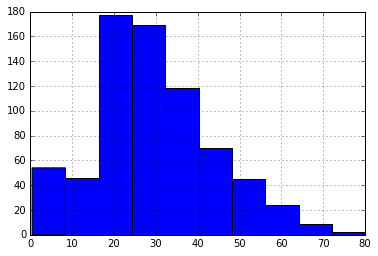

In [122]:
%matplotlib inline
import pylab as P
df['Age'].hist()
P.show()

Inside the parentheses of .hist(), you can also be more explicit about options of this function. Before you invoke it, you can also be explicit that you are dropping the missing values of Age usinf ```dropna()```.

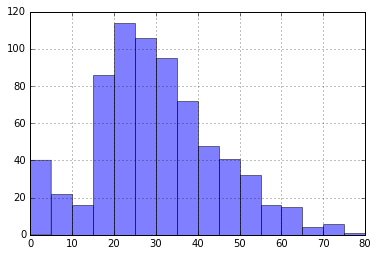

In [123]:
df['Age'].dropna().hist(bins=16, range=(0,80), alpha = .5)
P.show()

Cleaning the data
---------------------------------
-------------------------------

Ok now that we are comfortable with the syntax, we are ready to begin transforming the values in the dataframe into the shape we need for machine learning. First of all, it's hard to run analysis on the string values of "male" and "female". Let's practice transforming it in three ways -- twice for fun and once to make it useful. We'll store our transformation in a new column, so the original Sex isn't changed.

In Pandas, adding a column is as easy as naming it and passing it new values.

In [124]:
df['Gender'] = 4

In [125]:
df['Gender'].head(3)

0    4
1    4
2    4
Name: Gender, dtype: int64

I now make this new currently (currently constant 4) mean something that's actually derived from the Sex column. ```Iambda x``` is a built-in function of Python for generating an anonymous function in the moment, at runtime. Remember that x[0] of any string returns its first character.

In [126]:
df['Gender'] = df['Sex'].map( lambda x: x[0].upper() )

In [127]:
df['Gender'].head(3)

0    M
1    F
2    F
Name: Gender, dtype: object

But of course what we really need is a binary integer for female and male, similar to the way Survived is stored. As a matter of consistency, let's also make Gender into values of 0 and 1's. We have a precedent of analyzing the women first in all of our previous arrays, so let's decide ```female = 0``` and ```male = 1```.  So, for real this time:

In [128]:
df['Gender'] = df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

In [129]:
df['Gender'].head(3)

0    1
1    0
2    0
Name: Gender, dtype: int32

Next, I look into performing a similar filter on the Embarked values.

In [130]:
df['Embarked'].head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

I see that the "Embarked" data consists of S and C, but are there others?

In [131]:
df['Embarked'].nunique()

3

So I've missed one, and list a few more lines to try to find it.

In [132]:
df.Embarked[0:10]

0    S
1    C
2    S
3    S
4    S
5    Q
6    S
7    S
8    S
9    C
Name: Embarked, dtype: object

The three classes are S, C, Q. I need to descide how to asign. Decreasing frequency would make sense.

In [133]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

So, when I now add my new column, EmbNo (Emabarcation Number) - 0 for S, 1 for C, 2 for Q.

In [134]:
df['EmbNo'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [135]:
df.EmbNo[0:10]

0    0.0
1    1.0
2    0.0
3    0.0
4    0.0
5    2.0
6    0.0
7    0.0
8    0.0
9    1.0
Name: EmbNo, dtype: float64

In [136]:
df.EmbNo[0:10].astype(int)

0    0
1    1
2    0
3    0
4    0
5    2
6    0
7    0
8    0
9    1
Name: EmbNo, dtype: int32

Now it's time to deal with the missing values of Age, because most machine learning will need a complete set of values in that column to use it. By filling it in with guesses, we'll be introducing some noise into a model, but if we can keep our guesses reasonable, some of them should be close to the historical truth (whatever it was...), and the overall predictive power of Age might still make a better model than before.  We know the average [known] age of all passengers is 29.6991176 -- we could fill in the null values with that. But maybe the median would be better? (to reduce the influence of a few rare 70- and 80-year olds?) The Age histogram did seem positively skewed. These are the kind of decisions you make as you create your models in a Kaggle competition.

For now let's decide to be more sophisticated, that we want to use the age that was typical in each passenger class. And decide that the median might be better. Let's build another reference table to calculate what each of these medians are:

In [137]:
median_ages = np.zeros((2,3))
median_ages

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

I now populate the array with data pulled from the DataFrame.

In [138]:
for i in range(0, 2):
    for j in range(0, 3):
        median_ages[i,j] = df[(df['Gender'] == i) & \
                              (df['Pclass'] == j+1)]['Age'].dropna().median()
 
median_ages

array([[ 35. ,  28. ,  21.5],
       [ 40. ,  30. ,  25. ]])

We could fill in the missing ages directly into the Age column. But to be extra cautious and not lose the state of the original data, a more formal way would be to create a new column, AgeFill, and even record which ones were originally null (and thus artificially guessed).

Make a copy of Age:

In [139]:
df['AgeFill'] = df['Age'] #This is where we will enter our best guess on age.

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,EmbNo,AgeFill
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0.0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1.0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0.0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0.0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0.0,35.0


Take a look at just the rows with missing values, and limit it to the columns important to us right now:

In [140]:
df[ df['Age'].isnull() ][['Gender','Pclass','Age','AgeFill']].head(10)

,Gender,Pclass,Age,AgeFill
5,1,3,NaN,NaN
17,1,2,NaN,NaN
19,0,3,NaN,NaN
26,1,3,NaN,NaN
28,0,3,NaN,NaN
29,1,3,NaN,NaN
31,0,1,NaN,NaN
32,0,3,NaN,NaN
36,1,3,NaN,NaN
42,1,3,NaN,NaN


Use some code to fill in AgeFill based on our median_ages table. Here we happen to use the alternate syntax for referring to an existing column, like ```df.Age``` rather than ```df['Age']```.  There's a where clause on df and referencing its column AgeFill, then assigning it an appropriate value out of median_ages.

In [141]:
for i in range(0, 2):
    for j in range(0, 3):
        df.loc[ (df.Age.isnull()) & (df.Gender == i) & (df.Pclass == j+1),'AgeFill'] = median_ages[i,j]

In [142]:
df[ df['Age'].isnull() ][['Gender','Pclass','Age','AgeFill']].head(10)

,Gender,Pclass,Age,AgeFill
5,1,3,NaN,25.0
17,1,2,NaN,30.0
19,0,3,NaN,21.5
26,1,3,NaN,25.0
28,0,3,NaN,21.5
29,1,3,NaN,25.0
31,0,1,NaN,35.0
32,0,3,NaN,21.5
36,1,3,NaN,25.0
42,1,3,NaN,25.0


This confirms we accomplished exactly what we wanted.

Let's also create a feature that records whether the Age was originally missing. This is relatively simple by allowing pandas to use the integer conversion of the True/False evaluation of its built-in function, pandas.isnull()

In [143]:
df['AgeIsNull'] = pd.isnull(df.Age).astype(int)

Now that we have 4 new numerical columns, Gender, EmbNo, AgeFill, AgeIsNull.

In [144]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender,EmbNo,AgeFill,AgeIsNull
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,889.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587,0.362205,29.112424,0.198653
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.477989,0.636157,13.304424,0.399212
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.420000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400,0.000000,NaN,21.500000,0.000000
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200,1.000000,NaN,26.000000,0.000000
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000,1.000000,NaN,36.000000,0.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,2.000000,80.000000,1.000000


Feature Engineering
---------------------------
-----------------------------
Let's create a couple of other features, this time using simple math on existing columns. Since we know that Parch is the number of parents or children onboard, and SibSp is the number of siblings or spouses, we could collect those together as a FamilySize.

In [145]:
df['FamilySize'] = df['SibSp'] + df['Parch']

We can also create artificial features if we think it may be advantageous to a machine learning algorithm -- of course, it might not. For example, we know Pclass had a large effect on survival, and it's possible Age will too. One artificial feature could incorporate whatever predictive power might be available from both Age and Pclass by multiplying them. This amplifies 3rd class (3 is a higher multiplier) at the same time it amplifies older ages. Both of these were less likely to survive, so in theory this could be useful.

In [146]:
df['Age*Class'] = df.AgeFill * df.Pclass

We could make some histograms of our new columns to understand them better.

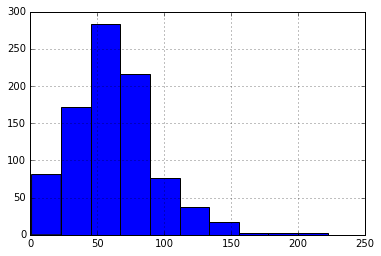

In [147]:
df['Age*Class'].hist()
P.show()

We know we'd like to have better predictive power for the men. A further thought is to try to pull out more information from the Name column -- for example the honorary or pedestrian title of the men.

Final preparation
----------------------------
--------------------------

We have our data almost ready for machine learning. But most basic ML techniques will not work on strings, and in python they almost always require the data to be an array-- the implementations we will see in the ```sklearn``` package are not written to use a pandas dataframe. So the last two things we need to do are 

(1) determine what columns we have left which are not numeric

(2) send our pandas.DataFrame back to a numpy.array.

In pandas we can see the column types from the .info() method. You can also see them directly: 

In [148]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Gender           int32
EmbNo          float64
AgeFill        float64
AgeIsNull        int32
FamilySize       int64
Age*Class      float64
dtype: object

With a little manipulation, we can require .dtypes to show only the columns which are 'object', which for pandas means it has strings:

In [149]:
df.dtypes[df.dtypes.map(lambda x: x=='object')]

Name        object
Sex         object
Ticket      object
Cabin       object
Embarked    object
dtype: object

We can also drop 'Age' even though it is numeric, since we copied and filled that to a better column AgeFill. The original 'Age' still has the missing values which won't work well in our future model.

In [150]:
df = df.drop(['Age'], axis=1)

An alternate command is to drop any rows which still have missing values:

In [151]:
df = df.dropna()

But remember that .dropna() removes an observation from df even if it only has 1 NaN, anywhere, in any of its columns. It could delete most of your dataset if you aren't careful with the state of missing values in other columns!

Now we have a clean and tidy dataset that is ready for analysis.

The final step is to convert it into a Numpy array. Pandas can always send back an array using the .values method. Assign to a new variable, train_data:

In [152]:
train_data = df.values
train_data

array([[2L, 1L, 1L, ..., 0, 1L, 38.0],
       [4L, 1L, 1L, ..., 0, 1L, 35.0],
       [7L, 0L, 1L, ..., 0, 0L, 54.0],
       ..., 
       [880L, 1L, 1L, ..., 0, 1L, 56.0],
       [888L, 1L, 1L, ..., 0, 0L, 19.0],
       [890L, 1L, 1L, ..., 0, 0L, 26.0]], dtype=object)

Here we used Pandas as a much easier tool to access the data in a csv file and manipulate it.

Scripting in Pandas
-----------------
-----------------
The genderclass model program converted to Pandas by Dov Grobgeld.

In [91]:
import pandas as pd
import numpy as np
import os

In order to analyse the price column I need to bin up that data here are my binning parameters the problem we face is some of the fares are very large So we can either have a lot of bins with nothing in them or we can just absorb some information and just say anythng over 30 is just in the last bin so we add a ceiling.

In [92]:
fare_ceiling = 40
fare_bracket_size = 10
number_of_fares = fare_ceiling // fare_bracket_size
number_of_classes = 3 #There were 1st, 2nd and 3rd classes on board

In [93]:
def ReadTitanicCsv(filename):
  """Read the data and add a new column BinFare"""
  frame = (pd.read_csv(filename,skipinitialspace=1,index_col=[0])
           # Drop columns not used (not really necessary)
           .drop(['Ticket','Cabin','Embarked'],axis=1))

  # Add the BinFare column
  frame['BinFare'] = ((frame.Fare//fare_bracket_size)
                      .clip_upper(number_of_fares-1)
                      # Use class as substitute if no fare was given
                      .fillna(3-frame.Pclass)
                      .astype(np.int))
  return frame

In [94]:
# Read data and add the bin column
data = ReadTitanicCsv('train.csv')

This reference table will show we the proportion of survivors as a function of Gender, class and ticket fare. I can now find the stats  of all the women and men on board.

In [95]:
# Create a lookup table of survival
survival_table = (data.groupby(['Sex','Pclass','BinFare'])
                  # Extract survival column and take mean value.
                  ['Survived'].mean()
                  # Survive if more than half the people survived.
                  > 0.5).astype(np.int)

# Read the test file
test = ReadTitanicCsv('test.csv')

Add survival table based on looking up the survival value of Sex,Pclass, and BinFare. Use Series.get(key,default) and supply 0 (died) if key was not found.

In [96]:
test['Survived'] = (
  test.apply(lambda s: survival_table.get((s.Sex, s.Pclass, s.BinFare),0),
             axis=1))

# Save the result
test[['Survived']].to_csv('genderclassmodel-pandas.csv')